       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800


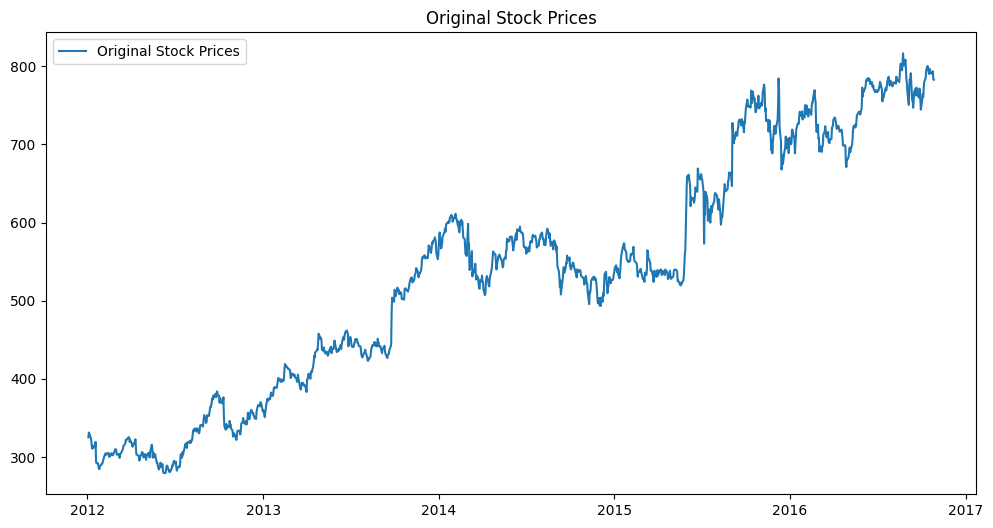

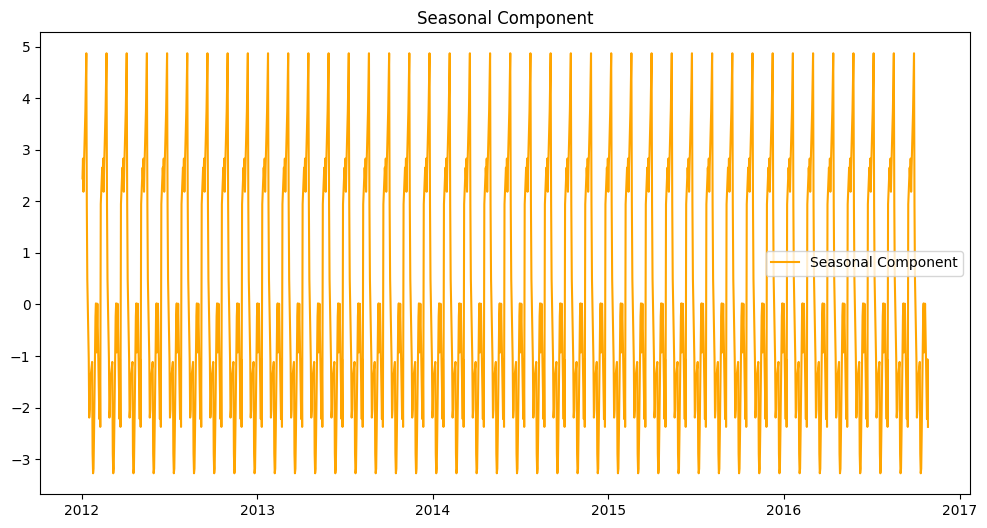

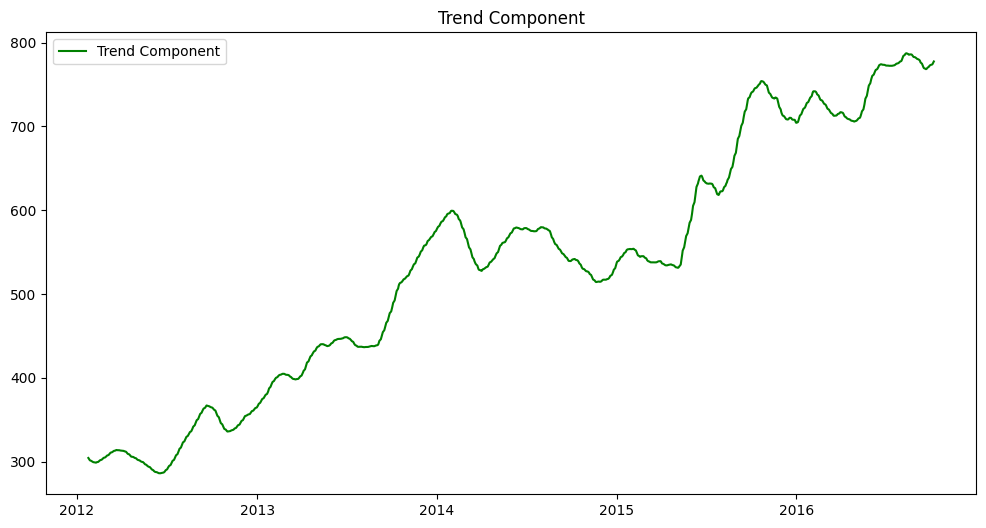

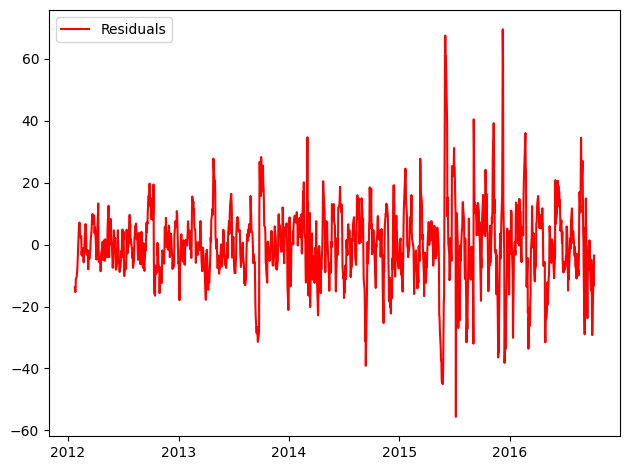

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


df = pd.read_csv('Google_Stock_Price_Train.csv')

print(df.head())

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

stock_data = df['Open']

new_index = pd.date_range(start=stock_data.index.min(), periods=len(stock_data), freq='B')[:len(stock_data)]
stock_data.index = new_index

decomposition = seasonal_decompose(stock_data, model='additive', period=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

plt.figure(figsize=(12, 6))
plt.plot(stock_data, label='Original Stock Prices')
plt.title('Original Stock Prices')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(seasonal, label='Seasonal Component', color='orange')
plt.title('Seasonal Component')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(trend, label='Trend Component', color='green')
plt.title('Trend Component')
plt.legend()
plt.show()

plt.plot(residuals, label='Residuals', color='red')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
